In [10]:
import sys, os, time, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# --- local package ------------------------------------------------------------
sys.path.append(os.path.abspath('..'))
from mlmc import MLMC, C_MLMC
from mlmc.bs_model import MilsteinBSLevelFunction, bs_exact_call
from mlmc.payoffs import call_payoff

In [11]:
# Black-Scholes parameters
S0     = 100.0     # Initial stock price
K      = 100.0     # Strike price
r      = 0.05      # Risk-free rate
sigma  = 0.4       # Volatility
T      = 1.0       # Time to maturity
payoff   = lambda S: call_payoff(S, K)

level_fn = MilsteinBSLevelFunction(S0, r, sigma, T, payoff,verbose=False).simulate

mlmc_obj = MLMC(level_fn, Lmin=2, Lmax=20, N0=2000)
eps = 0.01  # Target RMS error
price, Nl, Cl, total_cost = mlmc_obj.estimate(eps)

# Exact price
exact = bs_exact_call(S0, K, r, sigma, T)

print(f"MLMC Price: {price:.5f}")
print(f"Exact Price: {exact:.5f}")
print(f"Samples per level: {Nl}")

[Bias Check] L=2, extrapolated remainder=8.4982e+01, threshold=5.0000e-03
[Bias Check] L=3, extrapolated remainder=5.0187e-01, threshold=5.0000e-03
[Bias Check] L=4, extrapolated remainder=6.4989e-01, threshold=5.0000e-03
[Bias Check] L=5, extrapolated remainder=4.0720e-01, threshold=5.0000e-03
[Bias Check] L=6, extrapolated remainder=1.9620e-01, threshold=5.0000e-03
[Bias Check] L=7, extrapolated remainder=1.0543e-01, threshold=5.0000e-03
[Bias Check] L=8, extrapolated remainder=4.6832e-02, threshold=5.0000e-03
[Bias Check] L=9, extrapolated remainder=2.8569e-02, threshold=5.0000e-03
[Bias Check] L=10, extrapolated remainder=1.1982e-02, threshold=5.0000e-03
[Bias Check] L=11, extrapolated remainder=7.0193e-03, threshold=5.0000e-03
[Bias Check] L=12, extrapolated remainder=2.8803e-03, threshold=5.0000e-03
MLMC Price: 18.02934
Exact Price: 18.02295
Samples per level: [15224538   652337   256802    98887    34504    13150     4579     2000
     2000     2000     2000     2000     2000]


In [12]:
total_cost

35741436.0

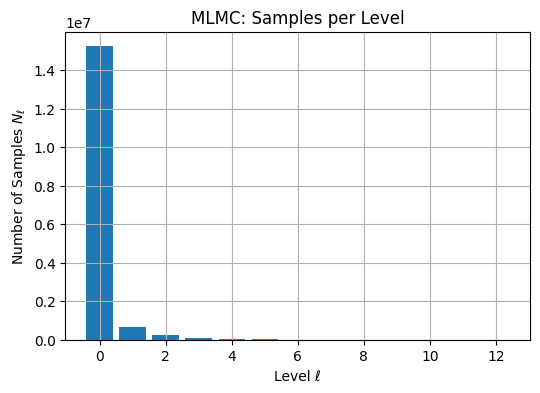

In [13]:
levels = np.arange(len(Nl))
plt.figure(figsize=(6, 4))
plt.bar(levels, Nl)
plt.xlabel("Level ℓ")
plt.ylabel("Number of Samples $N_\\ell$")
plt.title("MLMC: Samples per Level")
plt.grid(True)
plt.show()


In [ ]:
# Feature function for clustering
def feature_fn(detail):
    return np.array([detail['S_fine'] - K])


# Instantiate and run C-MLMC
cmlmc = C_MLMC(
    sde_step_fn=level_fn,
    feature_fn=feature_fn,
    Lmin=2,
    Lmax=20,
    N0=8192,
    n_clusters=3,
    theta=0.25,
)

eps = 0.01  # Target RMS error
price_cl, Nl_cl, Cl_cl, total_cost_cl = cmlmc.estimate(eps)

exact = bs_exact_call(S0, K, r, sigma, T)

# Results
print(f"C-MLMC Price: {price_cl:.5f}")
print(f"Exact Price: {exact:.5f}")
print(f"Samples per level: {Nl_cl}")


[Bias Check] L=2, extrapolated remainder=8.4969e+01, threshold=5.0000e-03
[Bias Check] L=3, extrapolated remainder=4.5088e-06, threshold=5.0000e-03
C-MLMC Price: 17.59560
Exact Price: 18.02295
Samples per level: [40182462  1586497   613312   426820]


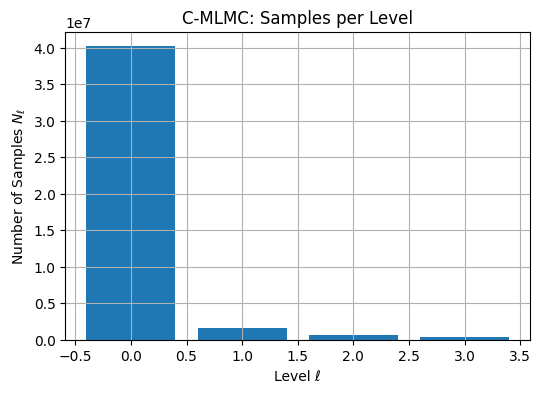

In [15]:
levels = np.arange(len(Nl_cl))
plt.figure(figsize=(6, 4))
plt.bar(levels, Nl_cl)
plt.xlabel("Level ℓ")
plt.ylabel("Number of Samples $N_\\ell$")
plt.title("C-MLMC: Samples per Level")
plt.grid(True)
plt.show()


In [16]:
total_cost_cl

152445630.0

In [17]:
total_cost_cl-total_cost

116704194.0